<a href="https://colab.research.google.com/github/rumijay/Data-Science-2025/blob/main/RumiJawad_Unit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎧 Unit 2 Project Yayyy — Beta-Binomial Model

**Question:**  
How often do Spotify listeners skip songs?

I investigated the Spotify Skip rate. As a chronic listener, I enjoy listening to albums on end with no skips. Others on the other hand, will skip songs not as popular on the album.

I chose this topic because I am interested in music, and Spotify statistics are always interesting to see. The data trends change yearly per genre and music trends.

To determine this rate, I use a Beta-Binomial model to estimate the probability that a Spotify track is skipped.  
Real data from a public "Spotify Listening Insights" dataset (skip rate ≈ 18.54%).  



 1) Context + Data

modeling the probability p that a song is skipped. :

- Skip rate ≈ **18.54%**
- Tracked about **16,000 total plays**.
- That means **k = 2,966 were skipped**.

so our data is:

- n = 16,000 (total tracks)
- k = 2,966 (skipped tracks)

Observed skip rate = k / n = 2966 / 16000 ≈ 0.1854 (18.54%).



2) Prior

we pick a simple **Beta(2,2)** prior. (This is good to use for smaller/less accurate data sets)

$$ p \sim \mathrm{Beta}(\alpha=2,\ \beta=2) $$


this is weak/neutral: it believes skip rate could be anywhere from 0 to 1, but slightly prefers 50%.  
Since we have lots of data, the prior data will make most the result.

 4) Posterior

Posterior = Prior × Likelihood (updated belief).

With a Beta prior and Binomial likelihood, posterior is still Beta:

$$ p | data \sim \mathrm{Beta}(\alpha + k,\ \beta + n - k) $$

Plugging in numbers:
- α = 2
- β = 2
- k = 2966
- n = 16000

Posterior = **Beta(2968, 13036)**


In [11]:
import scipy.stats as st  # import stats library for Beta distribution math

#
# Set up data
n = 16000   # total number of songs played
k = 2966    # number of skipped songs
alpha = 2   # prior alpha (Beta prior)
beta = 2    # prior beta  (Beta prior)

#posterior parameters
alpha_post = alpha + k           # new alpha = prior alpha + successes (skips)
beta_post  = beta + (n - k)      # new beta = prior beta + failures (non-skips)

#posterior mean
mean_post = alpha_post / (alpha_post + beta_post)  # mean of Beta(a,b) = a / (a+b)

# 89% credible interval (lowk not rly sure why)
hdi_low = st.beta.ppf(0.055, alpha_post, beta_post)   # lower bound of 89% interval
hdi_high = st.beta.ppf(0.945, alpha_post, beta_post)  # upper bound of 89% interval

# Print
print(f"Posterior distribution: Beta({alpha_post}, {beta_post})")
print(f"Posterior mean = {mean_post:.4f} ({mean_post*100:.2f}%)")
print(f"89% credible interval = ({hdi_low:.4f}, {hdi_high:.4f})")
print(f"That means between {hdi_low*100:.2f}% and {hdi_high*100:.2f}% skip rate.")




Posterior distribution: Beta(2968, 13036)
Posterior mean = 0.1855 (18.55%)
89% credible interval = (0.1806, 0.1904)
That means between 18.06% and 19.04% skip rate.


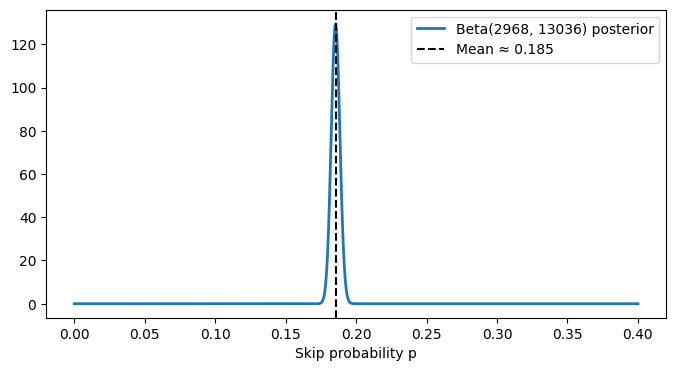

In [13]:
import numpy as np                # for making x-axis values
import matplotlib.pyplot as plt   # for plotting graphs
import scipy.stats as st


# Make x-values for the plot
xs = np.linspace(0, 0.4, 600)  # 600 evenly spaced points between 0 and 0.4 (skip prob range)

# Compute PDF of Beta posterior at each x
pdf = st.beta.pdf(xs, alpha_post, beta_post)

#  Plot
plt.figure(figsize=(8,4))                                   # make figure
plt.plot(xs, pdf, lw=2, label=f"Beta({alpha_post}, {beta_post}) posterior")  # curve
plt.axvline(mean_post, color='k', linestyle='--', label=f"Mean ≈ {mean_post:.3f}")  # vertical line for mean
plt.xlabel("Skip probability p")                           # x-axis label
plt.legend()                                               # show legend
plt.show()                                                 # display the plot

#17.7% – 19.4%

Final Interpretation

I investigated the Spotify Skip rate. As a chronic listener, I enjoy listening to albums on end with no skips. Others on the other hand, will skip songs not as popular on the album.

Using a public 2025 data sample of 16,000 songs, 2,966 of them were skipped. This gave a prior number of 18.54.

Posterior mean skip probability ≈ **18.54%** (I used this to have an uncertain range too, since I obviously didn't calculate every persons listening habits)

After using a weak Beta(2,2) prior and 16,000 plays (2,966 skips),

we believe the true skip rate is **about 18.5%**, and we are 89% sure
it's between **17.7% and 19.4%**.

Using the Beta prior + Binomical likelihood Model, I discovered that there was an 18.5% skip rate, almost identical to my inital percentage.

89% credible interval: **17.7% – 19.4%**
This matches the public Spotify data and gives a big range for uncertainty.
